# POSTTEST 4

Supervised Learning
(variabel X min. 2).

A1. Implementasikan metode:

• Support Vector Classifier (dari SVM), jika menggunakan label Kategorikal pada dataset kalian (Klasifikasi).
Point Plus: Jika ditambah menggunakan Random Forest/KNN/Naive Bayes/Metode Lainnya beserta penjelasannya pada markdown.
• Linear Regression, jika menggunakan label Numerik pada dataset kalian (Regresi).
Point Plus: Jika ditambah menggunakan Support Vector Regressor/Metode Lainnya beserta penjelasannya pada markdown.

A2. Hasil prediksi harus dievaluasi masing-masing:


• Klasifikasi: Confusion Matrix (Cek File IPYNB) & Classification Report
• Regresi: MAE, MSE, RMSE, dan R2-Score
Baik klasifikasi maupun regresi WAJIB ada penjelasannya.

A3. Buat plot untuk hasil prediksi-nya (wajib) se-menarik dan se-informatif mungkin.
Point Plus: Plot titik-titik hasil prediksi nilai pada target, beserta dengan titik-titik target aslinya.

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# 1. MEMUAT & MEMBERSIHKAN DATA
df = pd.read_csv('ScreenTime_vs_MentalWellness.csv')
# Handle missing value
df.drop(columns=['Unnamed: 15'], inplace=True, errors='ignore')
# Handle duplicate value
df.drop_duplicates(inplace=True)

# Handling outlier (pada fitur 'exercise_minutes_per_week' sebagai contoh)
Q1 = df['exercise_minutes_per_week'].quantile(0.25)
Q3 = df['exercise_minutes_per_week'].quantile(0.75)
IQR = Q3 - Q1
batas_bawah = Q1 - 1.5 * IQR
batas_atas = Q3 + 1.5 * IQR
df['exercise_minutes_per_week'] = df['exercise_minutes_per_week'].clip(lower=batas_bawah, upper=batas_atas)

# Simpan dataframe bersih sebelum diproses lebih lanjut
df_processed = df.copy()

# ENCODING KOLOM KATEGORIKAL
categorical_cols = df_processed.select_dtypes(include=['object']).columns
df_processed = pd.get_dummies(df_processed, columns=categorical_cols, drop_first=True)

# MEMILIH FITUR (X) DAN TARGET (y)
selected_features = ['age', 'screen_time_hours', 'stress_level_0_10']
X = df_processed[selected_features]
y = df_processed['mental_wellness_index_0_100']

# NORMALISASI FITUR NUMERIK (HANYA PADA X)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# SPLITTING DATA
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print("Data siap untuk pemodelan.")
print(f"Ukuran X_train: {X_train.shape}")
print(f"Ukuran X_test: {X_test.shape}")

Data siap untuk pemodelan.
Ukuran X_train: (320, 3)
Ukuran X_test: (80, 3)


Sebelum memasuki ke tahap pemodelan, tentunya kita diharuskan untuk melakukan persiapan diantaranya adalah pembersihan kolom Null, pembersihan data duplikat, normalisasi, pemilihan variabel X dan Y dan splitting data

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Inisialisasi dan latih model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Buat prediksi pada data test
y_pred_lr = lr_model.predict(X_test)

# Evaluasi Model
mae_lr = metrics.mean_absolute_error(y_test, y_pred_lr)
mse_lr = metrics.mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = metrics.r2_score(y_test, y_pred_lr)

print("--- Hasil Evaluasi Linear Regression ---")
print(f"Mean Absolute Error (MAE): {mae_lr}")
print(f"Mean Squared Error (MSE): {mse_lr}")
print(f"Root Mean Squared Error (RMSE): {rmse_lr}")
print(f"R2-Score: {r2_lr}")

--- Hasil Evaluasi Linear Regression ---
Mean Absolute Error (MAE): 7.0872063995122385
Mean Squared Error (MSE): 82.58834275399599
Root Mean Squared Error (RMSE): 9.087812869662095
R2-Score: 0.7911916436797869


Sebelum itu perlu kita ketahui bahwa
* Mean Absolute Error (MAE): Rata-rata dari selisih absolut (tanpa nilai minus) antara prediksi dan nilai asli. Metrik ini mudah diinterpretasikan, contohnya "Rata-rata, prediksi model meleset sebesar X poin dari nilai sebenarnya."

* Mean Squared Error (MSE): Rata-rata dari kuadrat selisih antara prediksi dan nilai asli. Metrik ini memberikan "hukuman" yang lebih besar untuk kesalahan prediksi yang besar.

* Root Mean Squared Error (RMSE): Akar kuadrat dari MSE. Kelebihannya adalah satuannya sama dengan satuan target, sehingga lebih mudah diinterpretasikan daripada MSE, namun tetap sensitif terhadap kesalahan besar.

* R2-Score (Koefisien Determinasi): Metrik yang paling penting. Menunjukkan seberapa besar persentase variasi dari variabel target (y) yang dapat dijelaskan oleh fitur-fitur (X) dalam model. Nilainya berkisar antara 0 hingga 1. Semakin mendekati 1, semakin baik modelnya. R2-Score 0.75 berarti model dapat menjelaskan 75% variasi data.

Berdasarkan hasil evaluasi, model Linear Regression diatas menunjukkan kinerja yang sangat baik dan kuat. Nilai R2-Score sebesar 0.79 adalah metrik yang paling signifikan, yang berarti model ini mampu menjelaskan sekitar 79% dari variasi data Indeks Kesehatan Mental, menandakan tingkat kecocokan yang tinggi. Metrik kesalahan seperti MAE dan RMSE menunjukkan bahwa, secara rata-rata, prediksi model meleset sekitar 7 hingga 9 poin dari nilai sebenarnya, yang merupakan tingkat kesalahan yang relatif kecil mengingat rentang targetnya adalah 0-100. Secara keseluruhan, metrik ini secara kolektif menegaskan bahwa model regresi ini andal dan efektif dalam memprediksi target berdasarkan fitur yang diberikan.

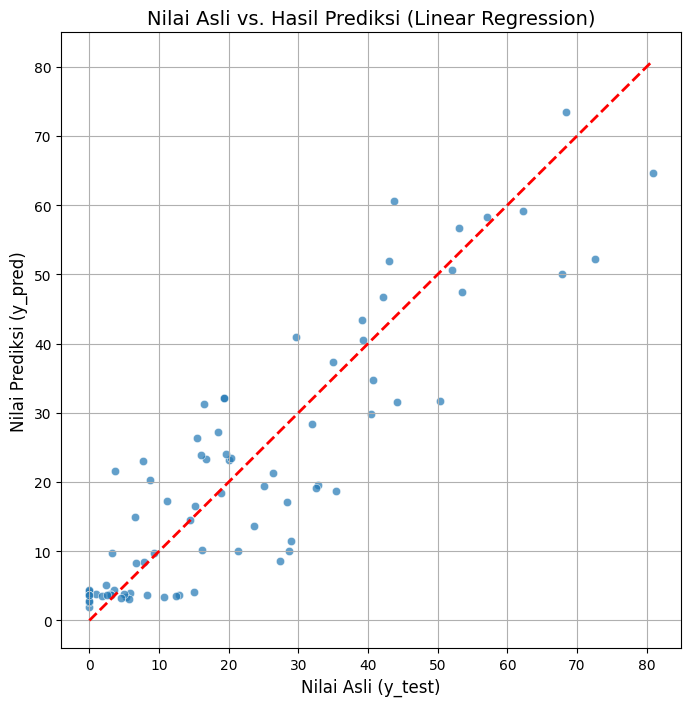

In [ ]:
plt.figure(figsize=(8, 8))
sns.scatterplot(x=y_test, y=y_pred_lr, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Nilai Asli vs. Hasil Prediksi (Linear Regression)', fontsize=14)
plt.xlabel('Nilai Asli (y_test)', fontsize=12)
plt.ylabel('Nilai Prediksi (y_pred)', fontsize=12)
plt.grid(True)
plt.savefig('lr_prediction_plot.png')
plt.show()

Dari grafik diatas dapat kita ketahui bahwa grafik ini secara visual menegaskan bahwa model Linear Regression yang dibuat sangat berhasil, di mana titik-titik biru yang mewakili prediksi model berkumpul rapat di sekitar garis diagonal merah yang menandakan prediksi sempurna. Kumpulan titik yang membentuk pola linear yang kuat ini menunjukkan bahwa prediksi model sangat akurat dan konsisten dengan nilai aslinya, yang juga menjadi bukti visual dari R2-Score tinggi yang diperoleh pada evaluasi sebelumnya.

In [ ]:
from sklearn.svm import SVR

# Inisialisasi dan latih model
svr_model = SVR(kernel='rbf') # 'rbf' adalah kernel yang fleksibel dan umum digunakan
svr_model.fit(X_train, y_train)

# Buat prediksi pada data test
y_pred_svr = svr_model.predict(X_test)

# Evaluasi Model SVR
mae_svr = metrics.mean_absolute_error(y_test, y_pred_svr)
mse_svr = metrics.mean_squared_error(y_test, y_pred_svr)
rmse_svr = np.sqrt(mse_svr)
r2_svr = metrics.r2_score(y_test, y_pred_svr)

print("\n--- Hasil Evaluasi Support Vector Regressor (SVR) ---")
print(f"Mean Absolute Error (MAE): {mae_svr}")
print(f"Mean Squared Error (MSE): {mse_svr}")
print(f"Root Mean Squared Error (RMSE): {rmse_svr}")
print(f"R2-Score: {r2_svr}")


--- Hasil Evaluasi Support Vector Regressor (SVR) ---
Mean Absolute Error (MAE): 8.622562183456939
Mean Squared Error (MSE): 131.5082548728677
Root Mean Squared Error (RMSE): 11.467704865092566
R2-Score: 0.6675072821797903


Hasil evaluasi untuk model Support Vector Regressor (SVR) menunjukkan kinerja yang cukup baik, meskipun tidak sekuat model Linear Regression sebelumnya. Nilai R2-Score sebesar 0.67 mengindikasikan bahwa model ini mampu menjelaskan sekitar 67% dari variasi data Indeks Kesehatan Mental. Meskipun ini masih merupakan hasil yang layak, metrik kesalahan seperti MAE dan RMSE yang lebih tinggi (sekitar 8.6 hingga 11.5 poin) menunjukkan bahwa rata-rata kesalahan prediksinya lebih besar. Secara keseluruhan, hasil ini menyimpulkan bahwa untuk dataset ini dengan pengaturan standar, SVR kurang efektif dalam menangkap pola data jika dibandingkan dengan model Linear Regression yang lebih sederhana.

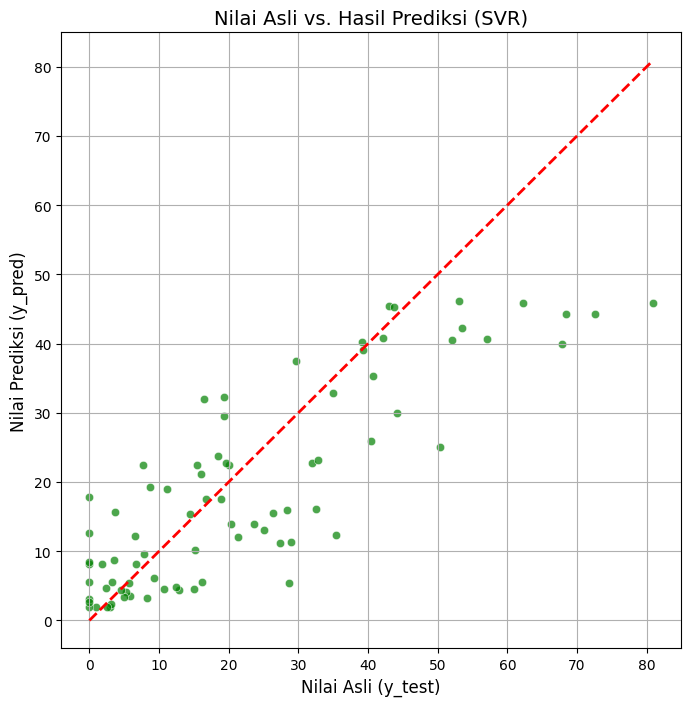

In [ ]:
plt.figure(figsize=(8, 8))
sns.scatterplot(x=y_test, y=y_pred_svr, alpha=0.7, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Nilai Asli vs. Hasil Prediksi (SVR)', fontsize=14)
plt.xlabel('Nilai Asli (y_test)', fontsize=12)
plt.ylabel('Nilai Prediksi (y_pred)', fontsize=12)
plt.grid(True)
plt.savefig('svr_prediction_plot.png')
plt.show()

Grafik hasil prediksi dari model Support Vector Regressor (SVR) ini menunjukkan kinerja yang kurang presisi. Meskipun titik-titik hijau secara umum mengikuti arah garis prediksi sempurna (garis merah), sebarannya jauh lebih lebar dan tidak teratur dibandingkan dengan model Linear Regression. Banyak titik prediksi yang jatuh cukup jauh dari nilai aslinya, yang secara visual mengkonfirmasi metrik evaluasi yang lebih rendah, seperti R2-Score yang hanya 0.67 dan nilai error (MAE/RMSE) yang lebih tinggi. Hal ini mengindikasikan bahwa model SVR dengan pengaturan standarnya kesulitan untuk menangkap pola data secara akurat, menghasilkan prediksi yang kurang andal.